## 1. Introduction

This notebook is to explore the data collected by ABC Bank to predict customer churn.

## 2. Imports

In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from matplotlib.pyplot import figure
import phik # calculates correlation even for categorical variables

In [2]:
#importing data
churn_data=pd.read_csv("../raw data/Churn_data.csv")

## 3. Data Exploration
## 3.1 Checking data types

In [3]:
#Preview of data
churn_data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
#Reviewing data types
churn_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

The data has 13 independant features of various data types (int,float,object) and the exited column is the dependant feature of interest. 

The HasCrCard and IsActiveMember are formatted as int64, but these are categorical features, so we should convert it into objects.

The dependant feature is formatted as int64, but we might want to convert it into object to make this a classification problem.

The customer name feature might not be of much use. This could be discarded later.

In [5]:
#Converting into correct formats
churn_data["Geography"]=churn_data["Geography"].astype("category")
churn_data["Gender"]=churn_data["Gender"].astype("category")
churn_data["HasCrCard"]=churn_data["HasCrCard"].astype("category")
churn_data["IsActiveMember"]=churn_data["IsActiveMember"].astype("category")
churn_data["Exited"]=churn_data["Exited"].astype("category")
churn_data.dtypes

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [6]:
#Reviewing data info
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  category
dtypes: category(5), float64(2), int64(6), object(1)
memory usage: 752.6+ KB


The dataset contains 10000 rows of data and there are no missing values present. So, we can continue with our data exploration

## 3.2 Reviewing numeric columns

In [7]:
#Reviewing data range for numercial variables
churn_data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts  EstimatedSalary  
count   10000.000000   10000.000000     10000.000000  
mean    76485.889288       1.530200    100090.239881  
std     62397.405202       0.581654     57510.492818  
min         0.000000       1.000000        11.580000  
25%         0.000000       1.000000     51002.110000  
50%     97198.540000       1.000000    100193.915000  
75%    127644.240000       2.000000    149388.247500  
max    250898.090000       4.000000    199992.480000

## 3.3 Reviewing categorical columns

In [8]:
#Reviewing categorical variables
churn_data.describe(include=['category'])

Geography Gender  HasCrCard  IsActiveMember  Exited
count      10000  10000      10000           10000   10000
unique         3      2          2               2       2
top       France   Male          1               1       0
freq        5014   5457       7055            5151    7963

In [9]:
#Get categories of independant variables
print(churn_data.Geography.value_counts())
print(churn_data.Gender.value_counts())
print(churn_data.HasCrCard.value_counts())
print(churn_data.IsActiveMember.value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
1    7055
0    2945
Name: HasCrCard, dtype: int64
1    5151
0    4849
Name: IsActiveMember, dtype: int64


In [10]:
#Get categories of dependant variables
print(churn_data.Exited.value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


### Insights:
    
    The customers are spread across 3 countries (France, Germany and Spain)
    The male and female customers are uniformly distributed
    About 70% of customers have credit card
    50% of customers are active members
### About 20% of customers have churned

In [11]:
profile_report = churn_data.profile_report(explorative=False, html={'style': {'full_width': True}})
profile_report

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3.4 Graphical data analysis of each column

In [13]:
def plots_to_explain(col):
    fig, ax =plt.subplots(1,2,figsize=(10,5))
    fig.tight_layout(pad=4)
    figure(figsize=(10, 6), dpi=80)
    ax[0].set_title("Histogram")
    sns.histplot(data=churn_data,x=col, ax=ax[0])
    ax[1].set_title("Scatterplot against customer exit")
    sns.violinplot(data=churn_data,y=col,x="Exited",order=[0,1], ax=ax[1])

In [14]:
def plots_to_explain_cat(col):
    fig, ax =plt.subplots(1,2,figsize=(10,5))
    fig.tight_layout(pad=4)
    ax[0].set_title("Histogram")
    sns.histplot(data=churn_data,x=col, ax=ax[0])
    ax[1].set_title("Barplot against customer exit")
    churn_data.groupby(col)["Exited"].value_counts().unstack().plot.bar(ax=ax[1])

In [15]:
import warnings
warnings.filterwarnings("ignore")

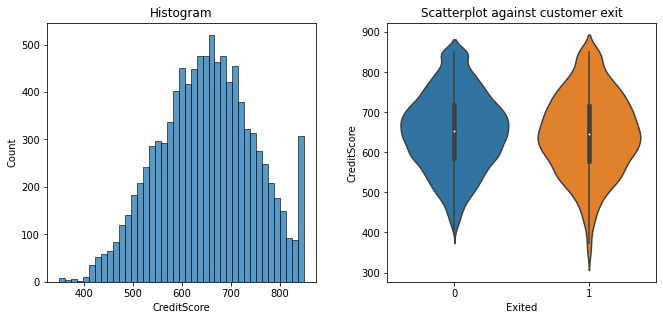

<Figure size 800x480 with 0 Axes>

In [16]:
#Detailed plot of credit score
plots_to_explain("CreditScore")

## Takeaways:
    The scores range from about 400 to 800. There is a big spike at the max score
    There is no significant explanation between credit score and customer  churn

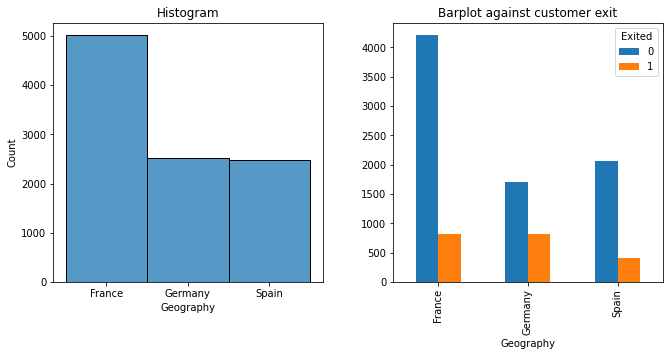

In [17]:
#Detailed plot ofGeography
plots_to_explain_cat("Geography")

## Takeaways:
    France has more customers, but the number of customers who churn is similartp Germany and Spain. So, customers in Germany and Spain have a higher chance in churning.

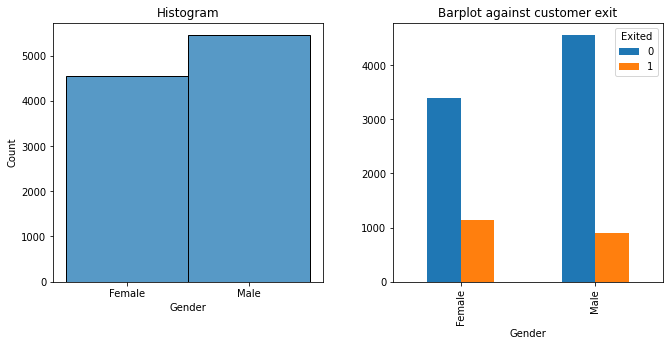

In [18]:
#Detailed plot of Gender
plots_to_explain_cat("Gender")

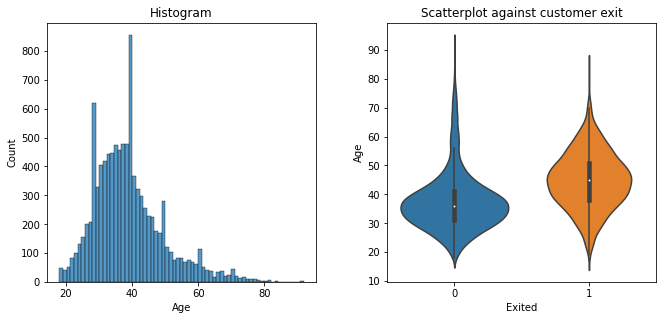

<Figure size 800x480 with 0 Axes>

In [19]:
#Detailed plot of Age
plots_to_explain("Age")

## Takeaways:
    The median age of churners is a little bit higher than those who do not churn

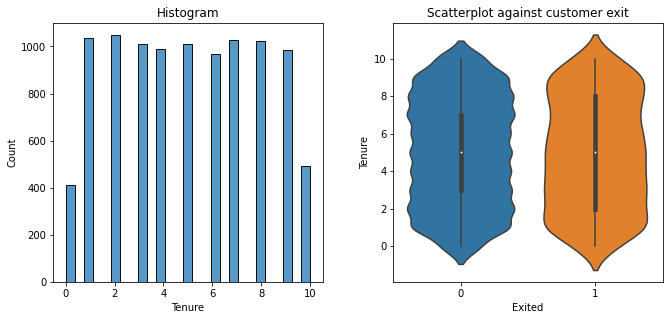

<Figure size 800x480 with 0 Axes>

In [20]:
#Detailed plot of Tenure
plots_to_explain("Tenure")

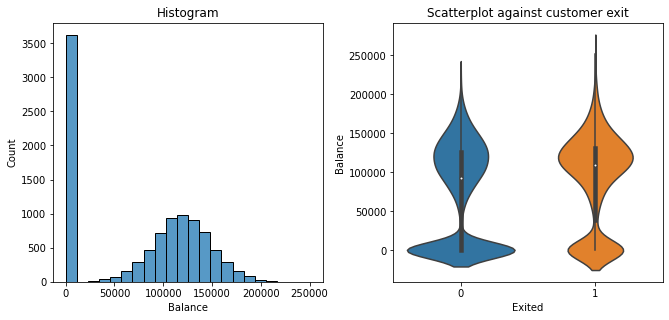

<Figure size 800x480 with 0 Axes>

In [21]:
#Detailed plot of Balance
plots_to_explain("Balance")

## Takeaways:
    Balance is bimodal with a majority of customers at 0 balance and the median at 125,000. It does not correlate well with churn

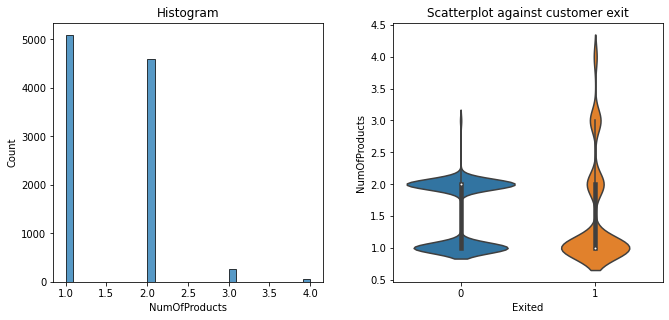

<Figure size 800x480 with 0 Axes>

In [22]:
#Detailed plot of NumOfProducts
plots_to_explain("NumOfProducts")

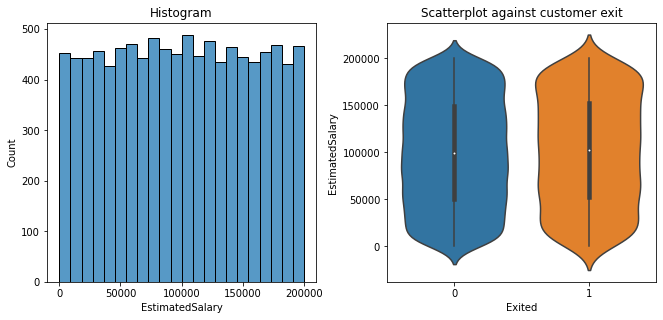

<Figure size 800x480 with 0 Axes>

In [23]:
#Detailed plot of HasCrCard
plots_to_explain("EstimatedSalary")

## Takeaways:
    Salary is uniformly distributed, which is not normal, but it doesn't seem to correlate directly with churn

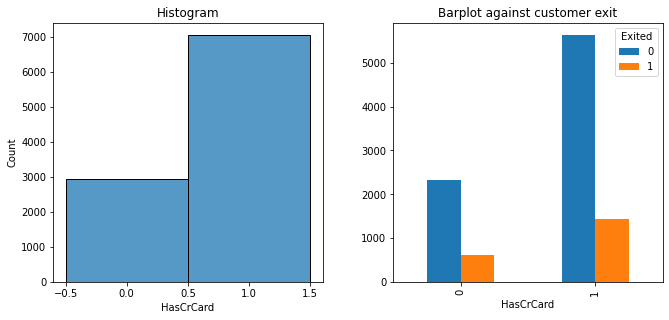

In [24]:
fig, ax =plt.subplots(1,2,figsize=(10,5))
fig.tight_layout(pad=4)
ax[0].set_title("Histogram")
sns.histplot(churn_data["HasCrCard"].cat.as_ordered(),ax=ax[0])
ax[1].set_title("Barplot against customer exit")
churn_data.groupby("HasCrCard")["Exited"].value_counts().unstack().plot.bar(ax=ax[1])
plt.show()

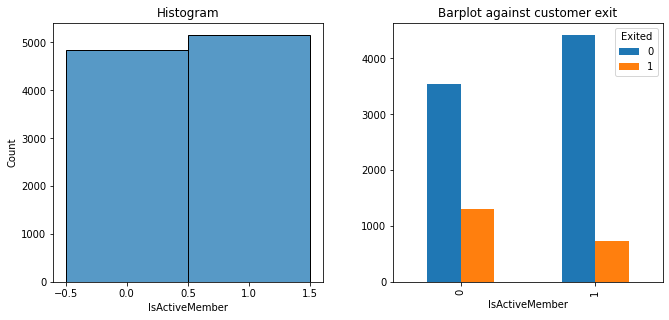

In [25]:
fig, ax =plt.subplots(1,2,figsize=(10,5))
fig.tight_layout(pad=4)
ax[0].set_title("Histogram")
sns.histplot(churn_data["IsActiveMember"].cat.as_ordered(),ax=ax[0])
ax[1].set_title("Barplot against customer exit")
churn_data.groupby("IsActiveMember")["Exited"].value_counts().unstack().plot.bar(ax=ax[1])
plt.show()

## Takeaways:
    Members who are active are less likely to churn

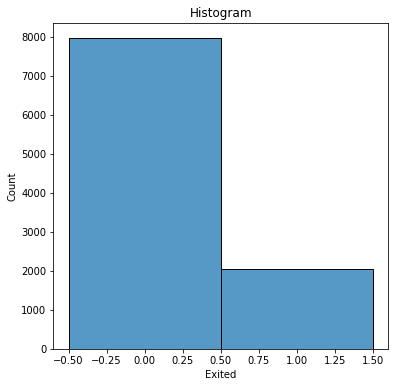

In [51]:
#Customer exited column
fig, ax =plt.subplots(figsize=(6,6))
ax.set_title("Histogram")
sns.histplot(churn_data["Exited"].cat.as_ordered())
plt.show()

## Takeaways:
    Only 20% of the customers churned. So, there is imbalance in the dataset as there is 80% of one class and 20% of the other.

## Summary:
### Key Findings:
1. France has twice as many customers, but the number of customers who churn is similar to Germany and Spain. So, customers in Germany and Spain have a higher risk of churning
2. The median age of churners is a little bit higher than those who do not churn
3. Members who are active are less likely to churn
4. Only 20% of the customers churned. So, there is imbalance in the dataset as there is 80% of one class and 20% of the other

### Other Observations:
4. The scores range from about 400 to 800. There is a big spike at the max score
5. There is no significant explanation between credit score and customer  churn
6. Balance is bimodal with a majority of customers at 0 balance and the median at 125,000. It does not correlate well with churn
7. Salary is uniformly distributed, which is not normal, but it doesn't seem to correlate directly with churn


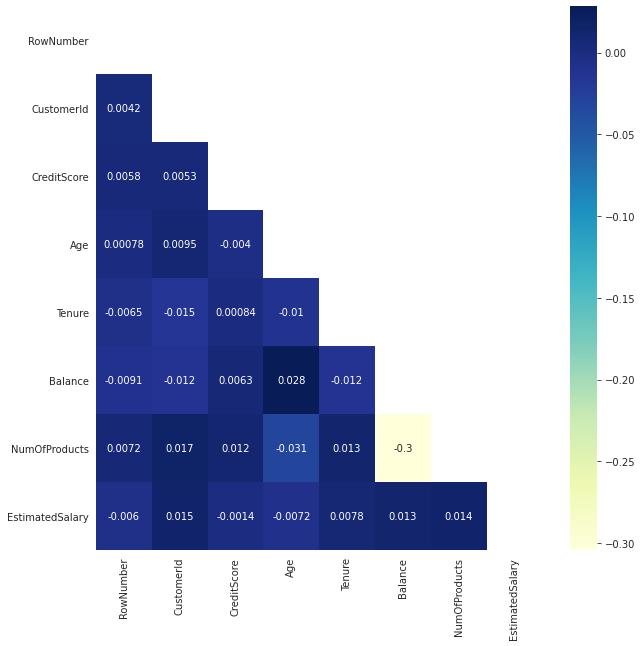

In [42]:
#Visualize correlations between numeric features
Var_Corr = churn_data.corr()
# plot the heatmap and annotation on it
mask = np.zeros_like(Var_Corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, cmap="YlGnBu",mask=mask)

interval columns not set, guessing: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


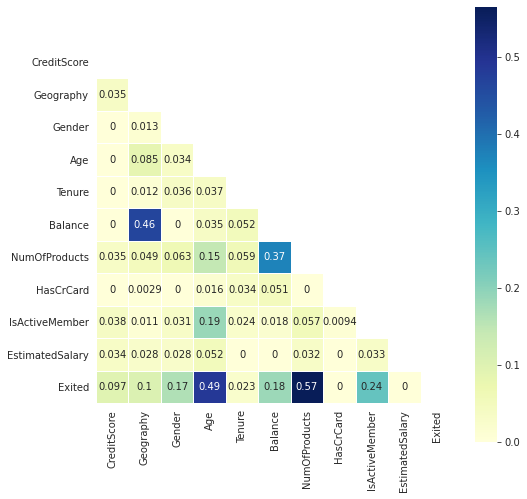

In [44]:
#Visualize correlations between all variables using phik correlation #pip install phik==0.10.0
cols_temp=['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'] #remove name, customer id, column number
phi_corr=churn_data[cols_temp].phik_matrix()
# plot the heatmap and annotation on it
mask = np.zeros_like(phi_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(phi_corr, xticklabels=phi_corr.columns, yticklabels=phi_corr.columns, cmap="YlGnBu",annot=True,linewidths=.5,mask=mask, square=True)

### Number of products and Age seem to have the highest correlation while Activness, Balance and tenure have moderate correlation with customer churn.
### Balance has good correlation with geography and number of products